In [49]:
import pandas as pd
df= pd.read_csv('Combined_DS_v10.csv')
df.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SurveyDate                  999 non-null    object 
 1   FormalEducation             999 non-null    object 
 2   ConvertedSalary             665 non-null    float64
 3   Hobby                       999 non-null    object 
 4   Country                     999 non-null    object 
 5   StackOverflowJobsRecommend  487 non-null    float64
 6   VersionControl              999 non-null    object 
 7   Age                         999 non-null    int64  
 8   Years Experience            999 non-null    int64  
 9   Gender                      693 non-null    object 
 10  RawSalary                   665 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 86.0+ KB


In [51]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.columns

Index(['ConvertedSalary', 'StackOverflowJobsRecommend', 'Age',
       'Years Experience'],
      dtype='object')

In [52]:
one_hot_encoded = pd.get_dummies(df, columns=['Country'], prefix='OH')

In [53]:
one_hot_encoded.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,OH_France,OH_India,OH_Ireland,OH_Russia,OH_South Africa,OH_Spain,OH_Sweeden,OH_UK,OH_USA,OH_Ukraine
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,NaN,Git,21,13,Male,NaN,0,0,0,0,1,0,0,0,0,0
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,7.0,Git;Subversion,38,9,Male,"70,841.00",0,0,0,0,0,0,1,0,0,0
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,8.0,Git,45,11,NaN,NaN,0,0,0,0,0,0,1,0,0,0
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,NaN,Zip file back-ups,46,12,Male,"21,426.00",0,0,0,0,0,0,1,0,0,0
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,8.0,Git,39,7,Male,"£41,671.00",0,0,0,0,0,0,0,1,0,0


In [54]:
dummies = pd.get_dummies(df, columns=['Country'], drop_first=True, prefix='DM')

In [55]:
dummies.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,DM_India,DM_Ireland,DM_Russia,DM_South Africa,DM_Spain,DM_Sweeden,DM_UK,DM_USA,DM_Ukraine
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,NaN,Git,21,13,Male,NaN,0,0,0,1,0,0,0,0,0
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,7.0,Git;Subversion,38,9,Male,"70,841.00",0,0,0,0,0,1,0,0,0
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,8.0,Git,45,11,NaN,NaN,0,0,0,0,0,1,0,0,0
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,NaN,Zip file back-ups,46,12,Male,"21,426.00",0,0,0,0,0,1,0,0,0
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,8.0,Git,39,7,Male,"£41,671.00",0,0,0,0,0,0,1,0,0


In [56]:
df['Country'].value_counts()

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
Ukraine           9
Ireland           5
Name: Country, dtype: int64

In [57]:
country_counts = df.Country.value_counts()
country_mask = df.Country.isin(country_counts[country_counts<10].index)

In [58]:
df.Country[country_mask] = 'Other'

C:\Users\psahai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
df['Country'].value_counts()

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
Other            14
Name: Country, dtype: int64

In [60]:
df['Paid_Job']=0

In [61]:
df.loc[df['ConvertedSalary']>0, 'Paid_Job']=1

In [62]:
df['ConvertedSalary'].fillna(0, inplace=True)

In [63]:
df.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,Paid_Job
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),0.0,Yes,South Africa,NaN,Git,21,13,Male,NaN,0
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00",1
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),0.0,No,Sweeden,8.0,Git,45,11,NaN,NaN,0
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00",1
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00",1


In [64]:
import numpy as np
bins = [-np.inf, 10000, 50000, 100000, 150000, np.inf]
labels = ['Very low', 'Low', 'Medium', 'High', 'Very high']
df['binned_salary'] = pd.cut(df['ConvertedSalary'], bins=bins, labels=labels)

In [65]:
df.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,Paid_Job,binned_salary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),0.0,Yes,South Africa,NaN,Git,21,13,Male,NaN,0,Very low
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00",1,Medium
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),0.0,No,Sweeden,8.0,Git,45,11,NaN,NaN,0,Very low
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00",1,Low
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00",1,Low


In [66]:
clean_df = df.dropna(how='any') 

In [67]:
df.Gender.value_counts()

Male                                                                         632
Female                                                                        53
Female;Male                                                                    2
Transgender                                                                    2
Female;Transgender                                                             1
Non-binary. genderqueer. or gender non-conforming                              1
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Name: Gender, dtype: int64

In [68]:
df.Gender.fillna('Not given', inplace=True)

In [69]:
df['StackOverflowJobsRecommend'].fillna(df['StackOverflowJobsRecommend'].\
                                        mean(), inplace=True)

In [73]:
df.round(1).head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,Paid_Job,binned_salary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),0.0,Yes,South Africa,7.1,Git,21,13,Male,NaN,0,Very low
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00",1,Medium
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),0.0,No,Sweeden,8.0,Git,45,11,Not given,NaN,0,Very low
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,7.1,Zip file back-ups,46,12,Male,"21,426.00",1,Low
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00",1,Low


In [76]:
df['RawSalary'] = df['RawSalary'].replace({'\$': '', ',': '','£':''}, regex=True).astype(float)

In [78]:
df.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,Paid_Job,binned_salary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),0.0,Yes,South Africa,7.061602,Git,21,13,Male,NaN,0,Very low
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.000000,Git;Subversion,38,9,Male,70841.0,1,Medium
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),0.0,No,Sweeden,8.000000,Git,45,11,Not given,NaN,0,Very low
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,7.061602,Zip file back-ups,46,12,Male,21426.0,1,Low
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.000000,Git,39,7,Male,41671.0,1,Low


In [79]:
df.RawSalary.isnull().sum()

334

In [80]:
df['RawSalary'].fillna(0, inplace=True)

In [84]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
min_max_Scaler = MinMaxScaler()
min_max_Scaler.fit(df[['Age']])
df['norm_age'] = min_max_Scaler.transform(df[['Age']])

In [108]:
#transformer = PowerTransformer()
#transformer.fit(df[['ConvertedSalary']])
#df['log_Salary'] = transformer.transform(df['ConvertedSalary'])
df['log_Salary'] = np.log2(df['ConvertedSalary']+1)

In [109]:
df.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary,Paid_Job,binned_salary,norm_age,log_Salary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),0.0,Yes,South Africa,7.061602,Git,21,13,Male,0.0,0,Very low,0.046154,0.000000
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.000000,Git;Subversion,38,9,Male,70841.0,1,Medium,0.307692,16.112317
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),0.0,No,Sweeden,8.000000,Git,45,11,Not given,0.0,0,Very low,0.415385,0.000000
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,7.061602,Zip file back-ups,46,12,Male,21426.0,1,Low,0.430769,14.387142
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.000000,Git,39,7,Male,41671.0,1,Low,0.323077,15.346791


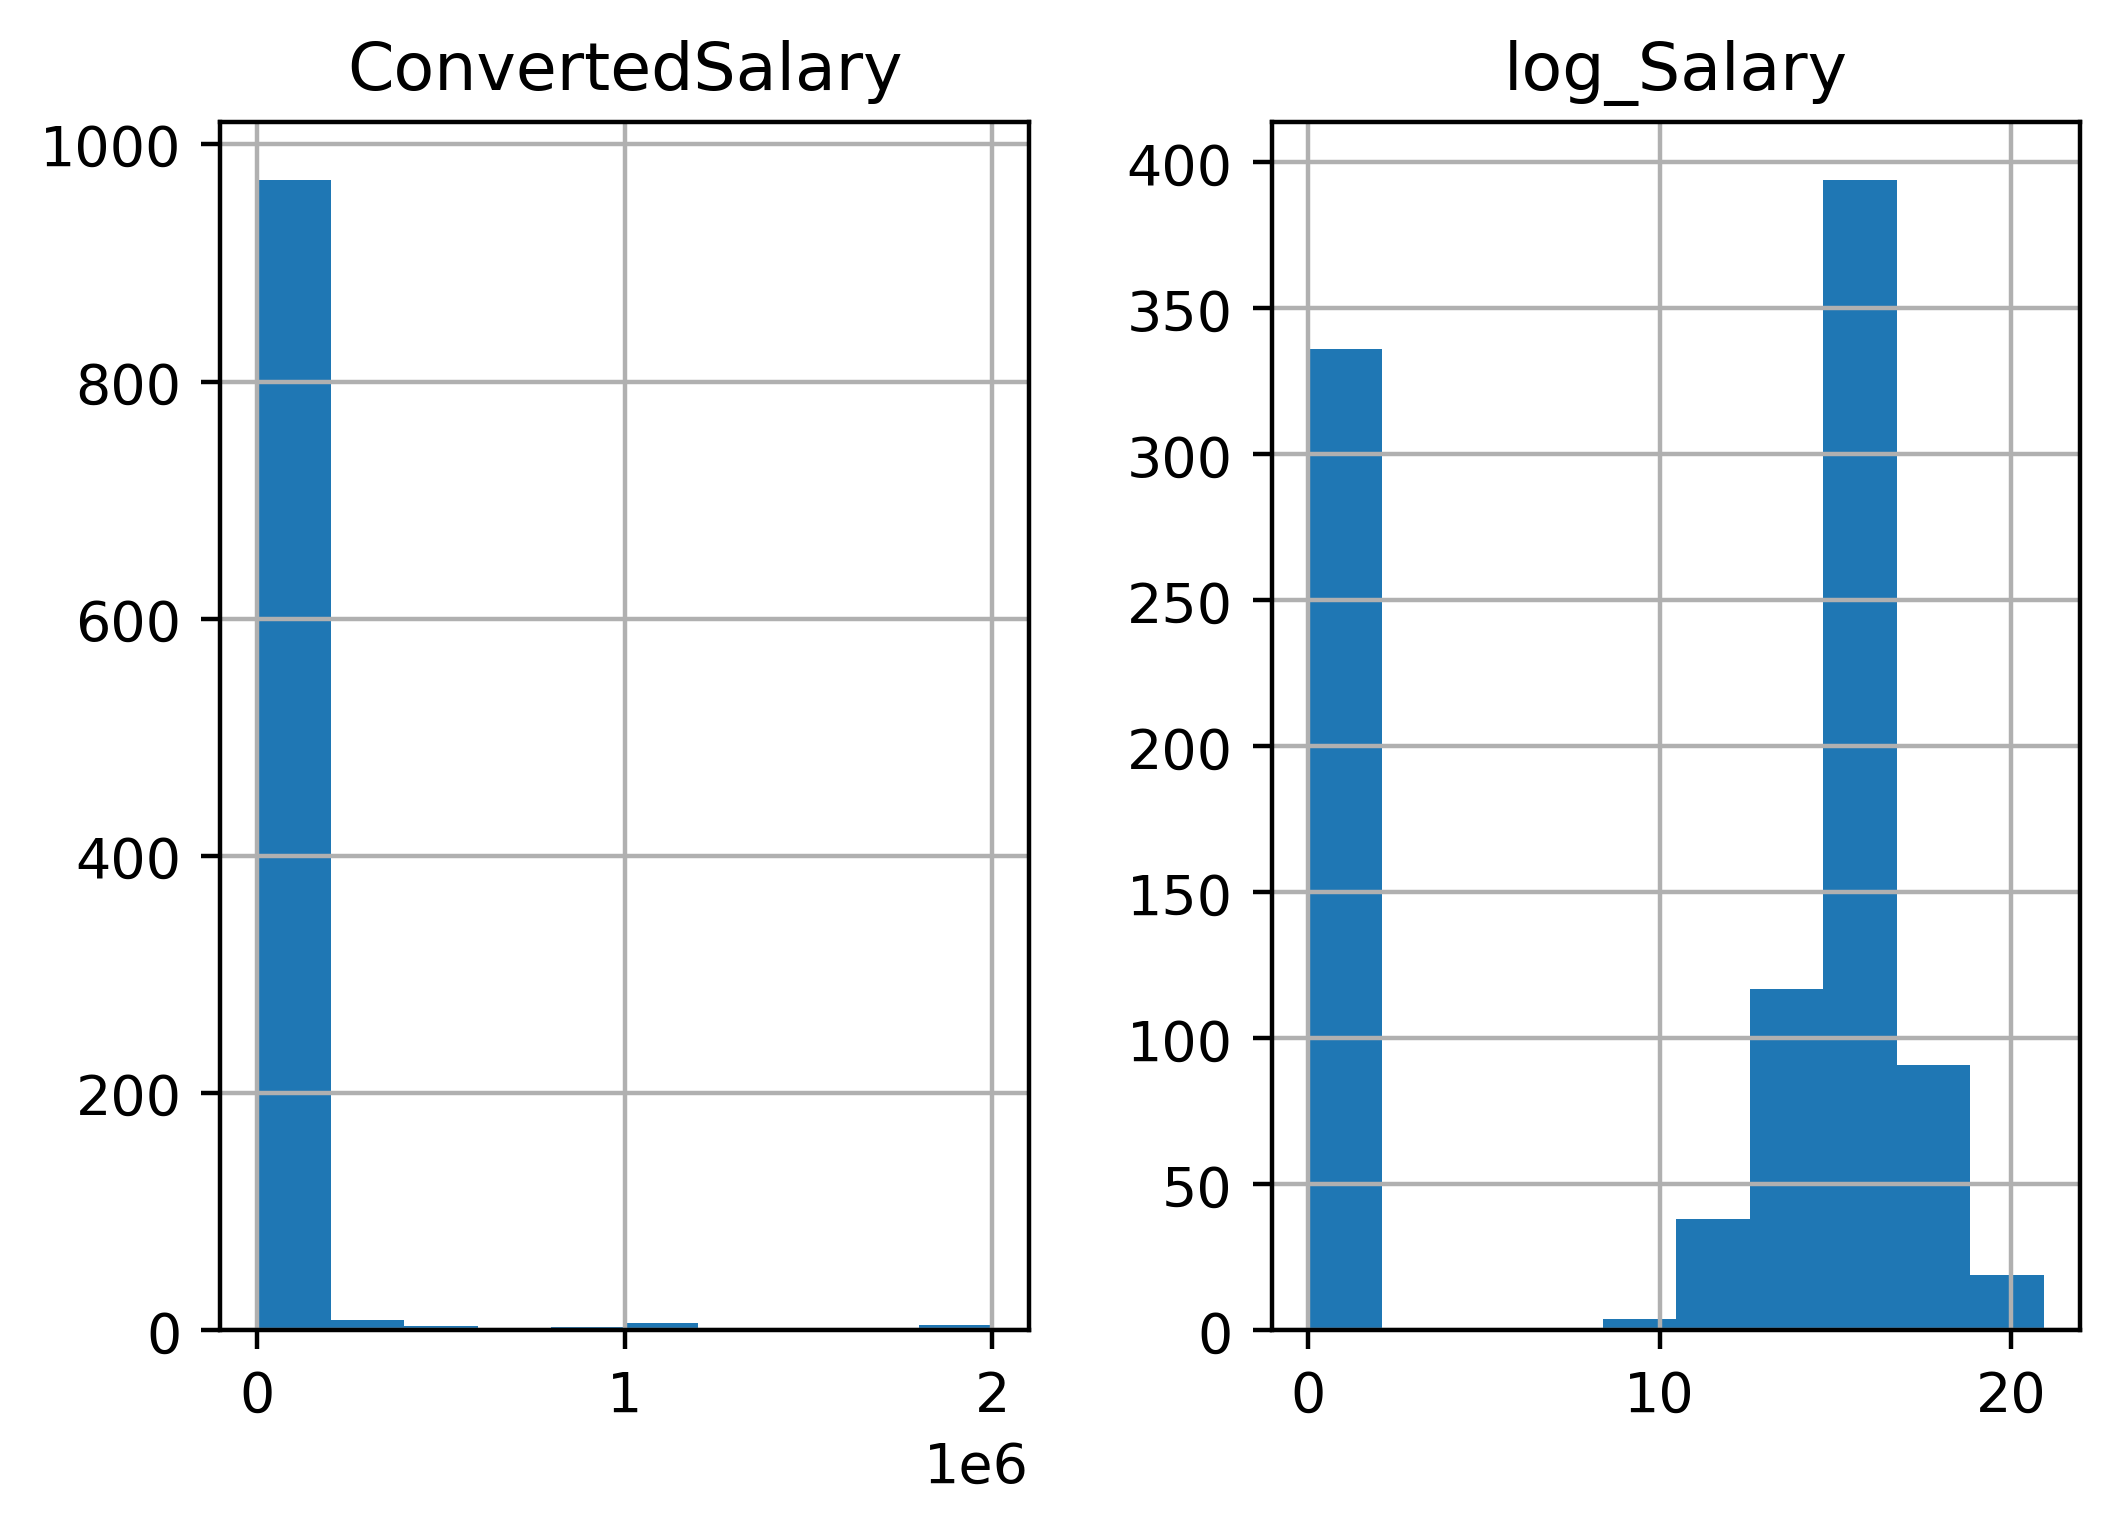

In [110]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=400
df[['ConvertedSalary','log_Salary']].hist();

In [121]:
quantile = df['ConvertedSalary'].quantile(0.95)

# Trim the outliers
trimmed_df = df[df['ConvertedSalary'] < quantile]

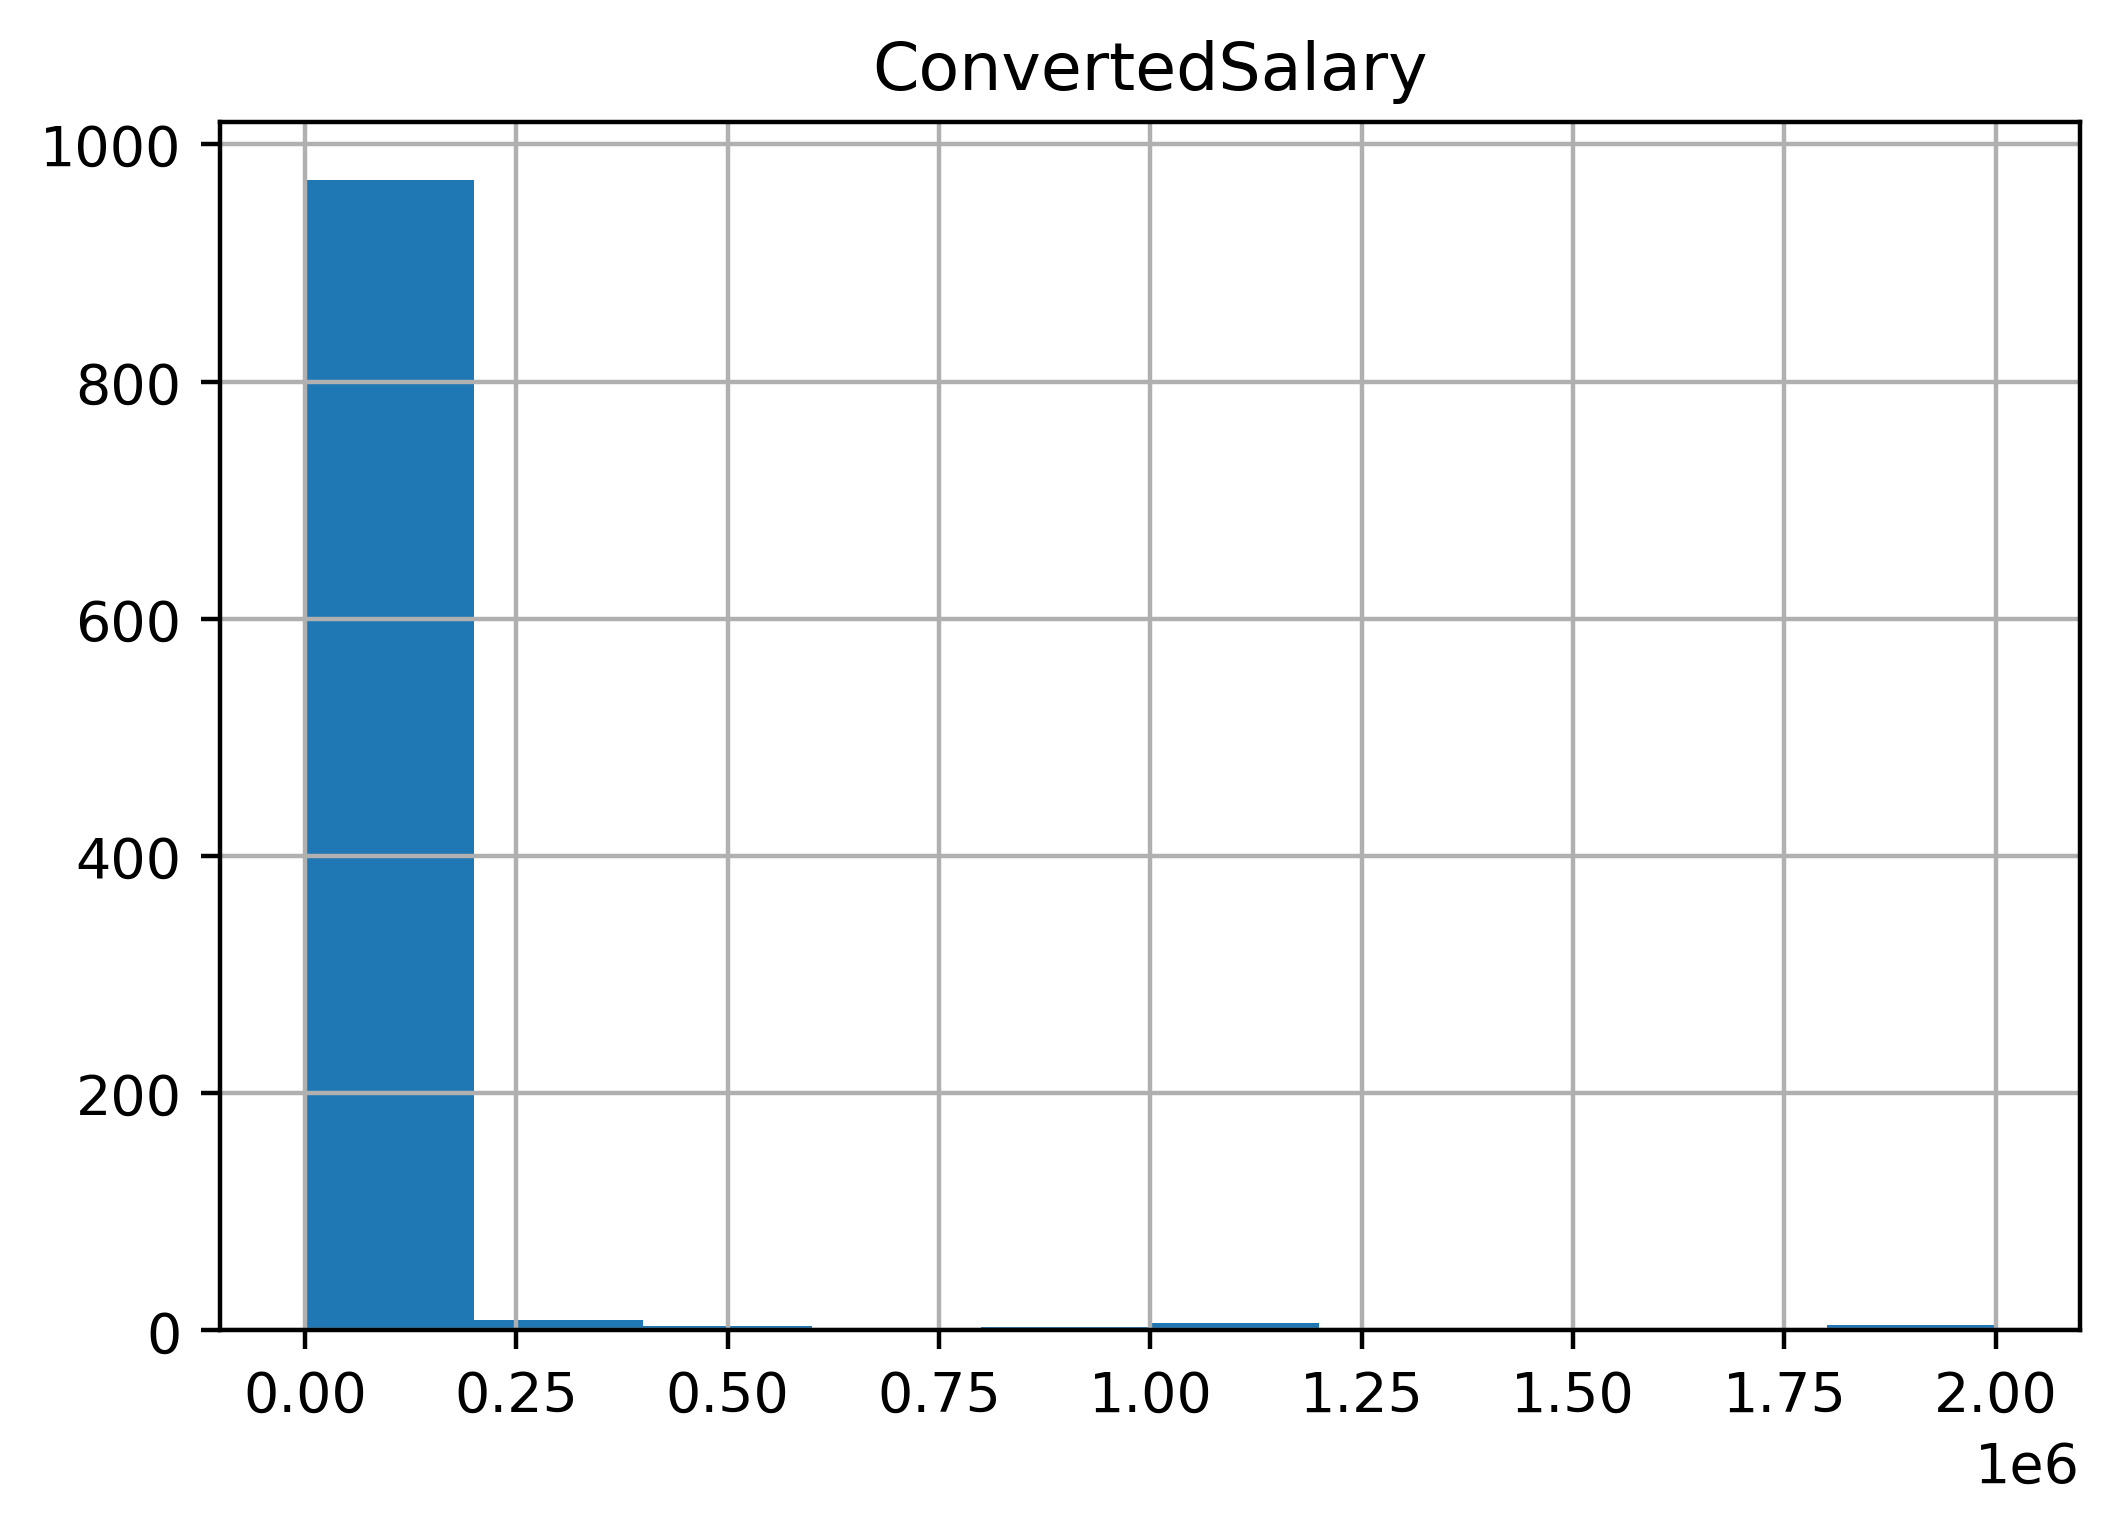

<Figure size 2400x1600 with 0 Axes>

In [129]:
# The original histogram
df[['ConvertedSalary']].hist()
plt.show()
plt.clf()

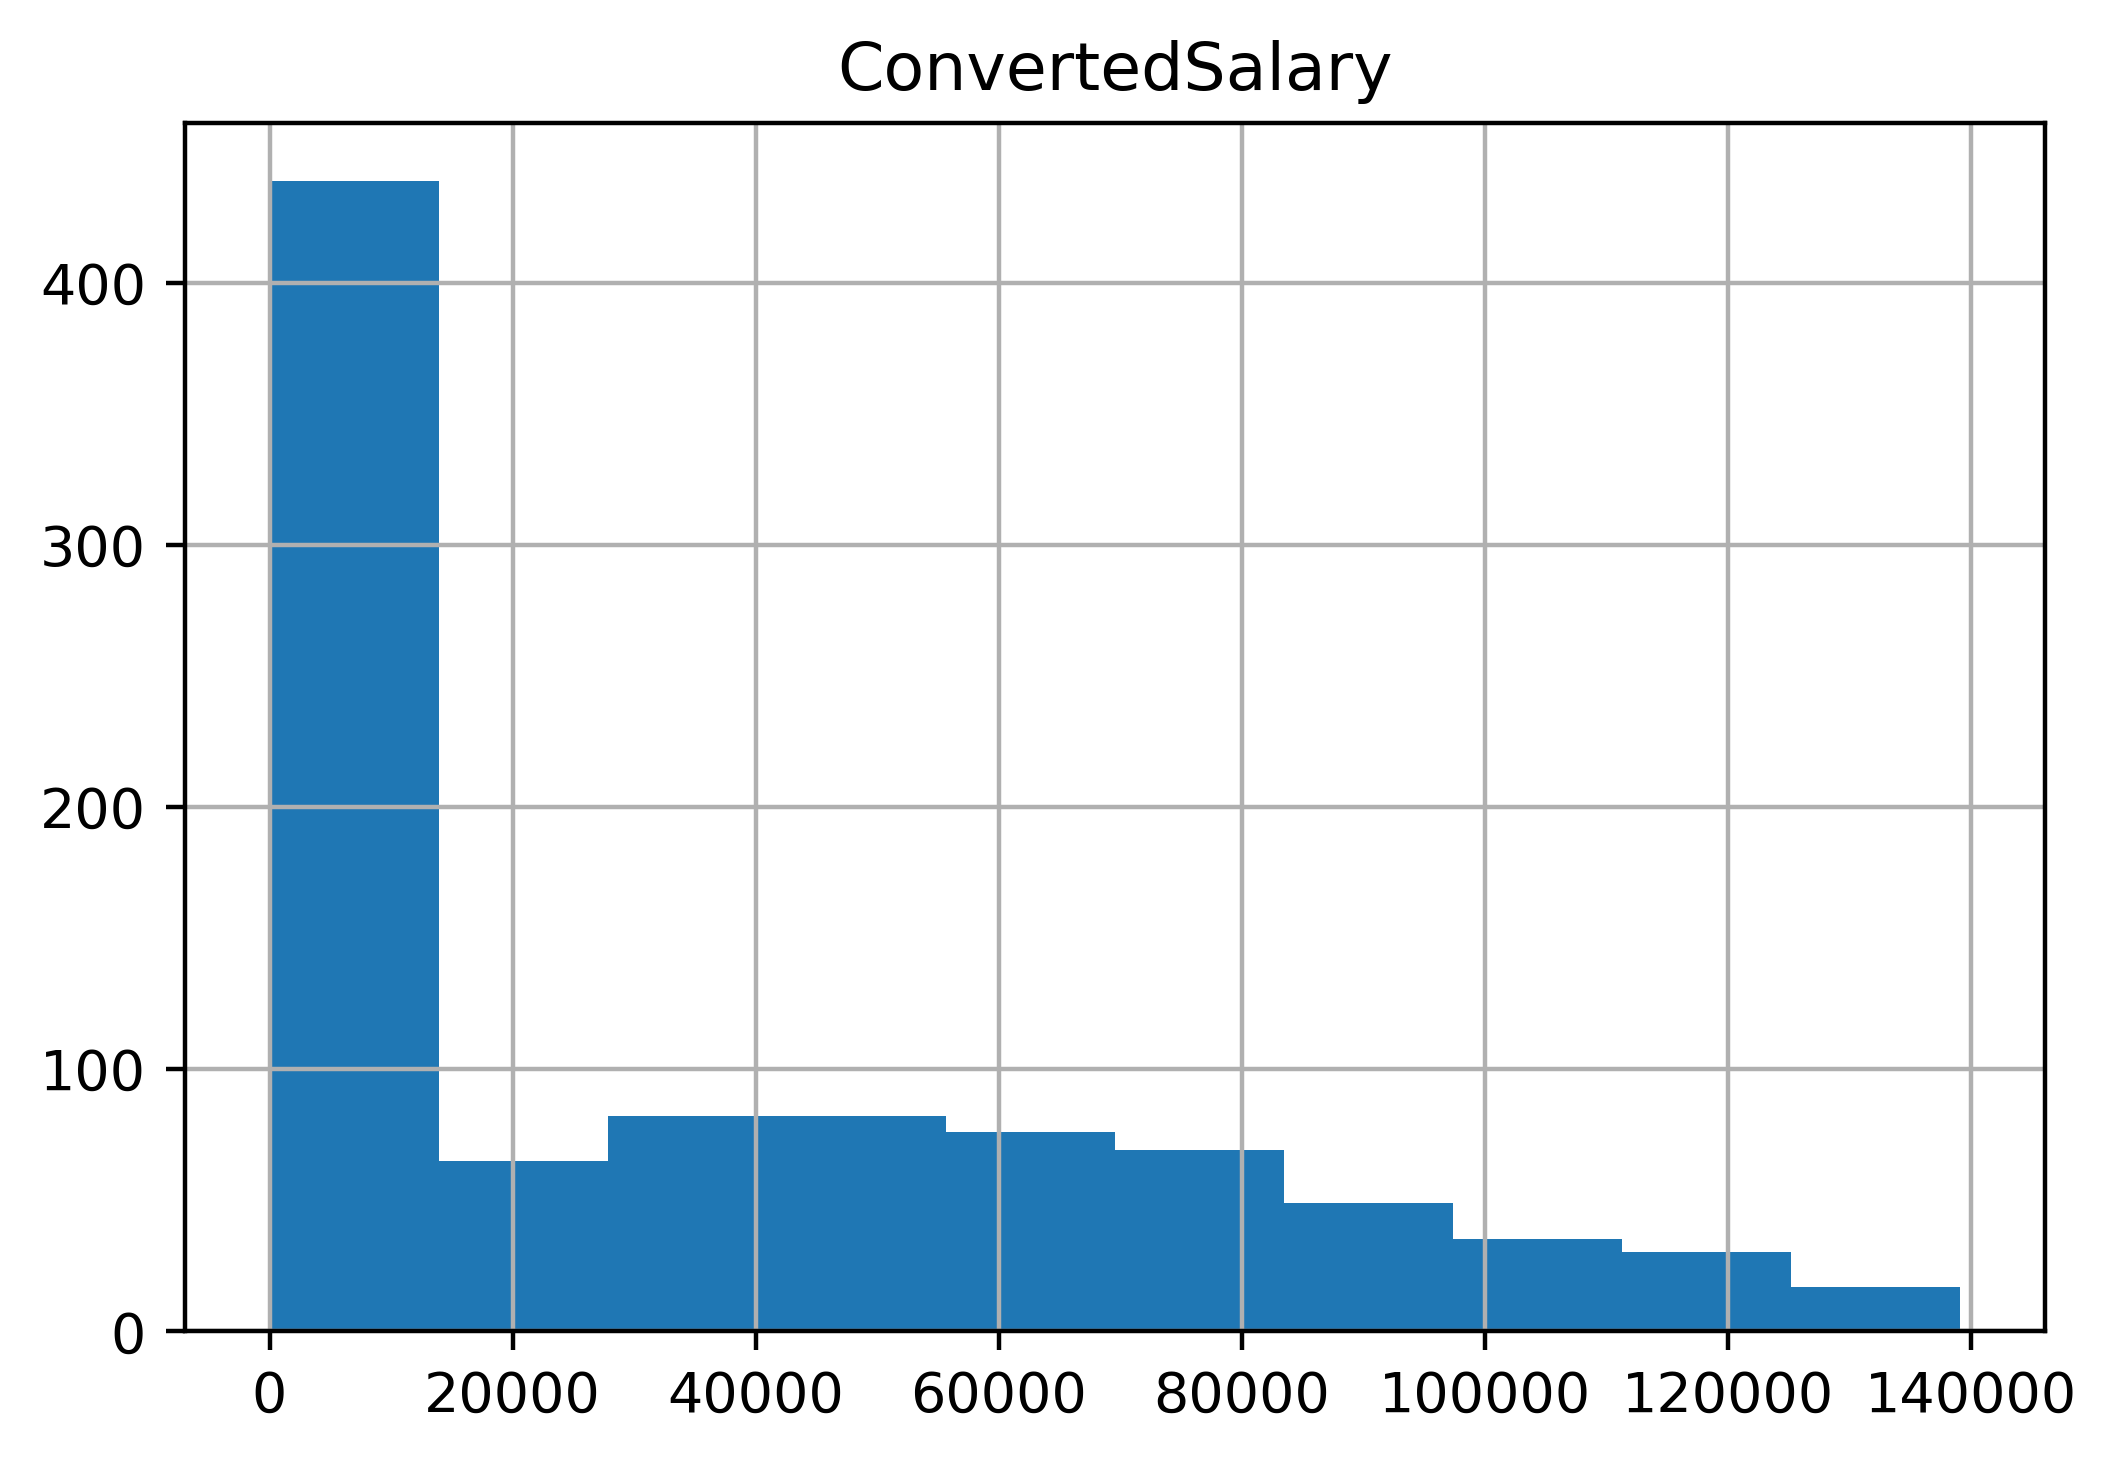

<Figure size 2400x1600 with 0 Axes>

In [124]:
# The original histogram
trimmed_df[['ConvertedSalary']].hist()
plt.show()
plt.clf()

In [125]:
mean = df['ConvertedSalary'].mean()
std = df['ConvertedSalary'].std()
cut_off = 3*std
cut_off

528277.2201428837

In [126]:
lower = mean - cut_off; upper = mean + cut_off

new_df = df[(df['ConvertedSalary'] > lower) &
            (df['ConvertedSalary'] < upper)]

In [119]:
upper

589894.6755983392

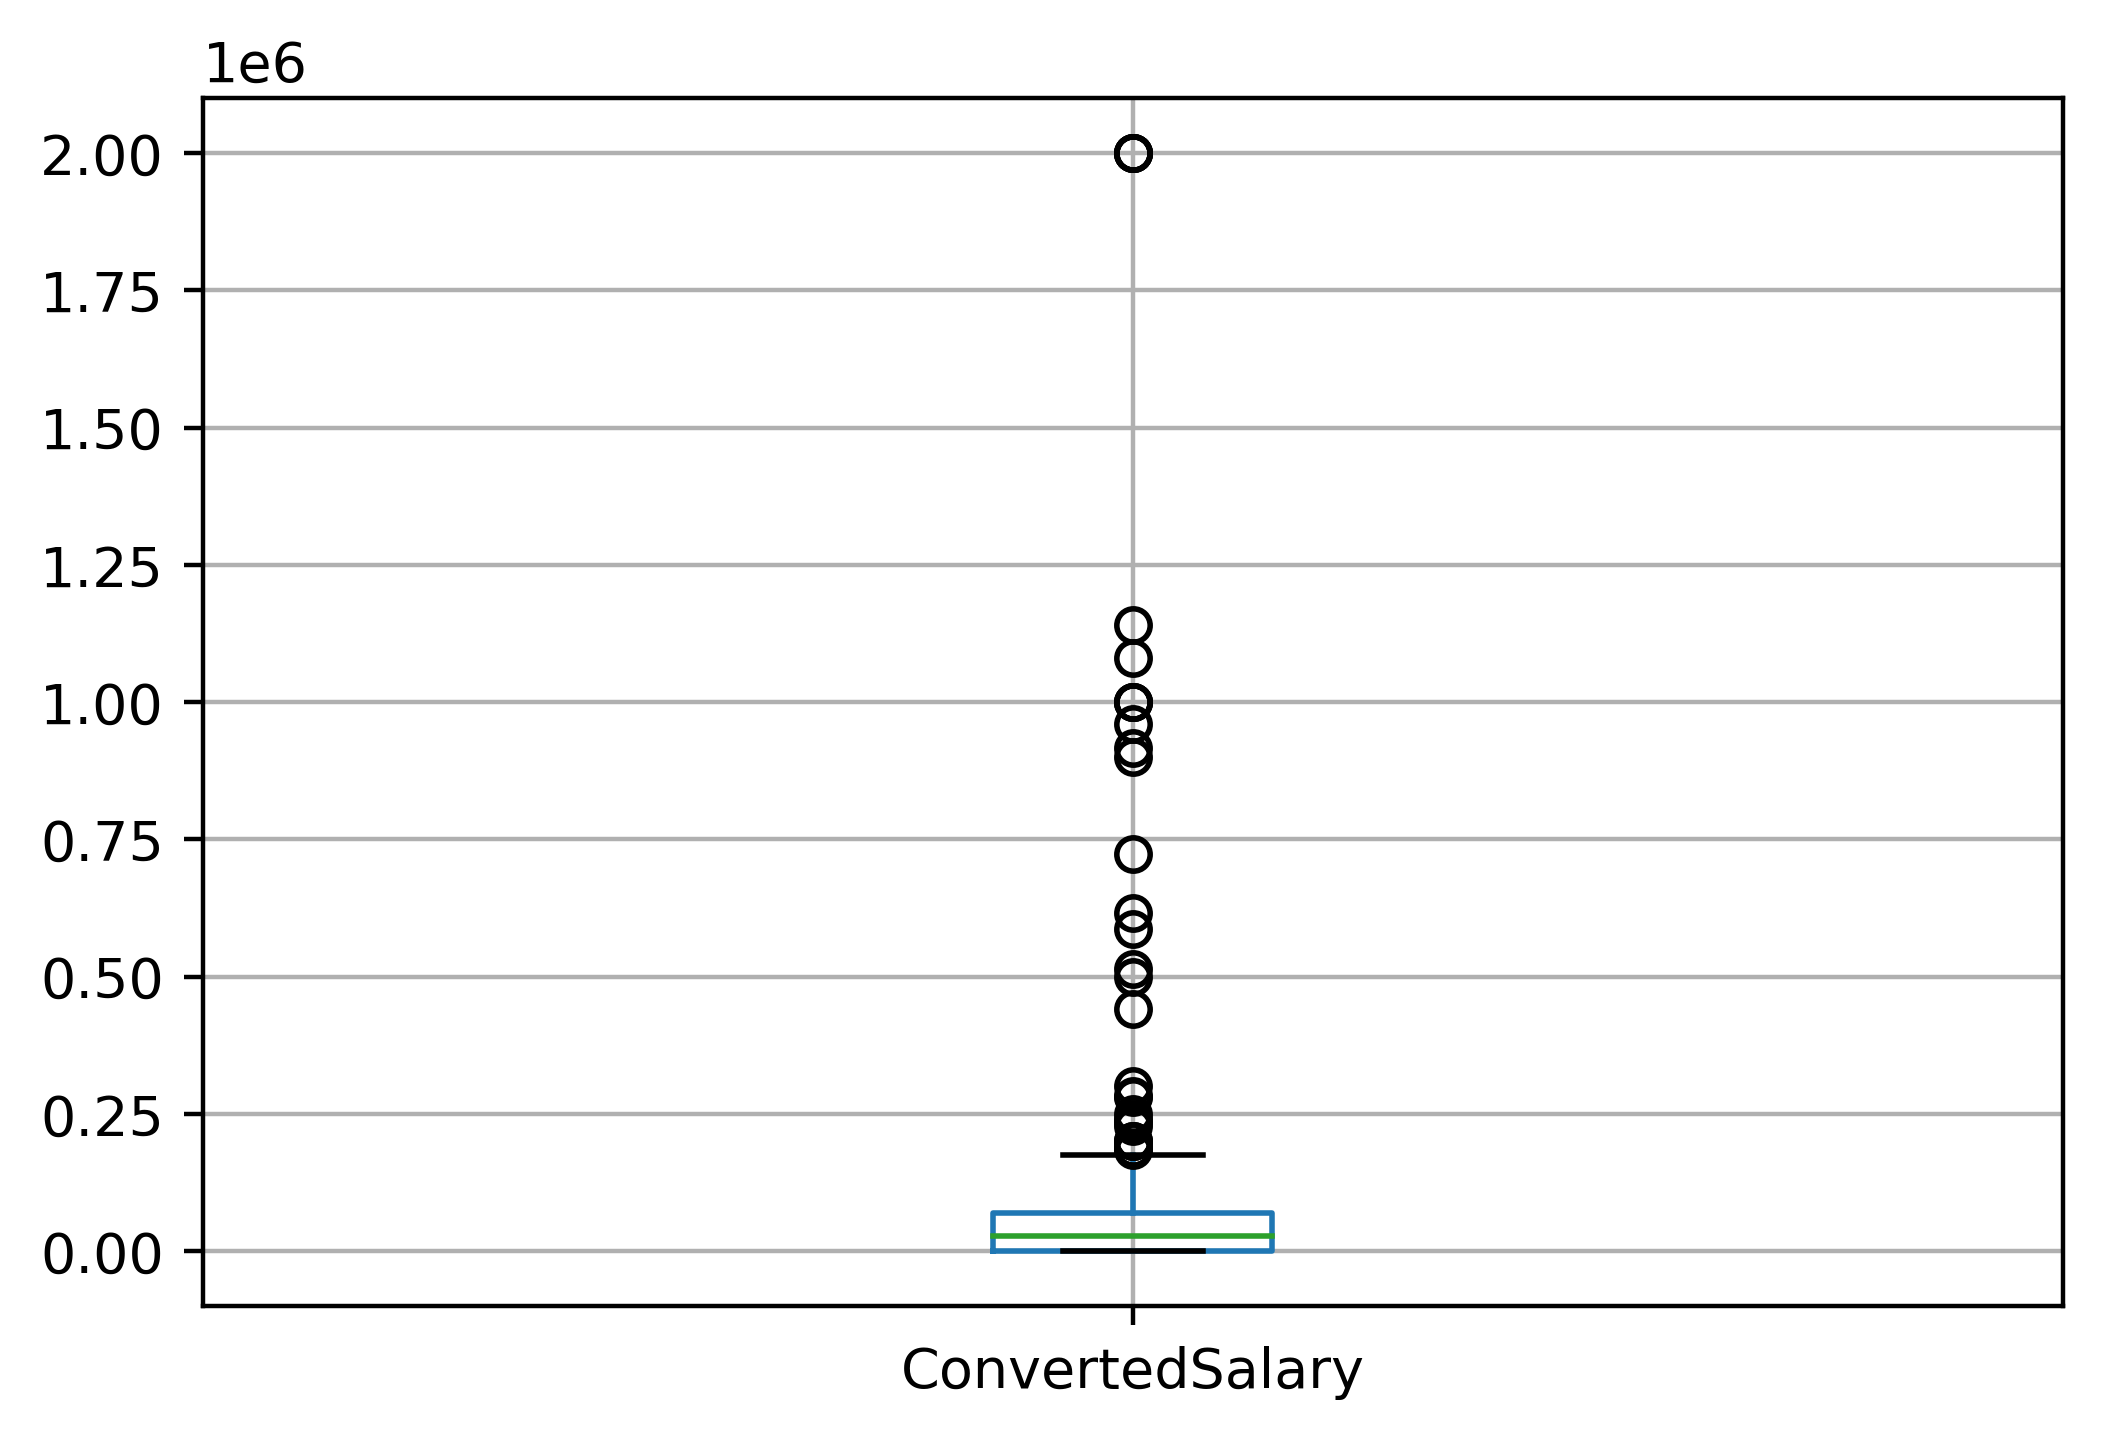

In [128]:
df[['ConvertedSalary']].boxplot()
plt.show()

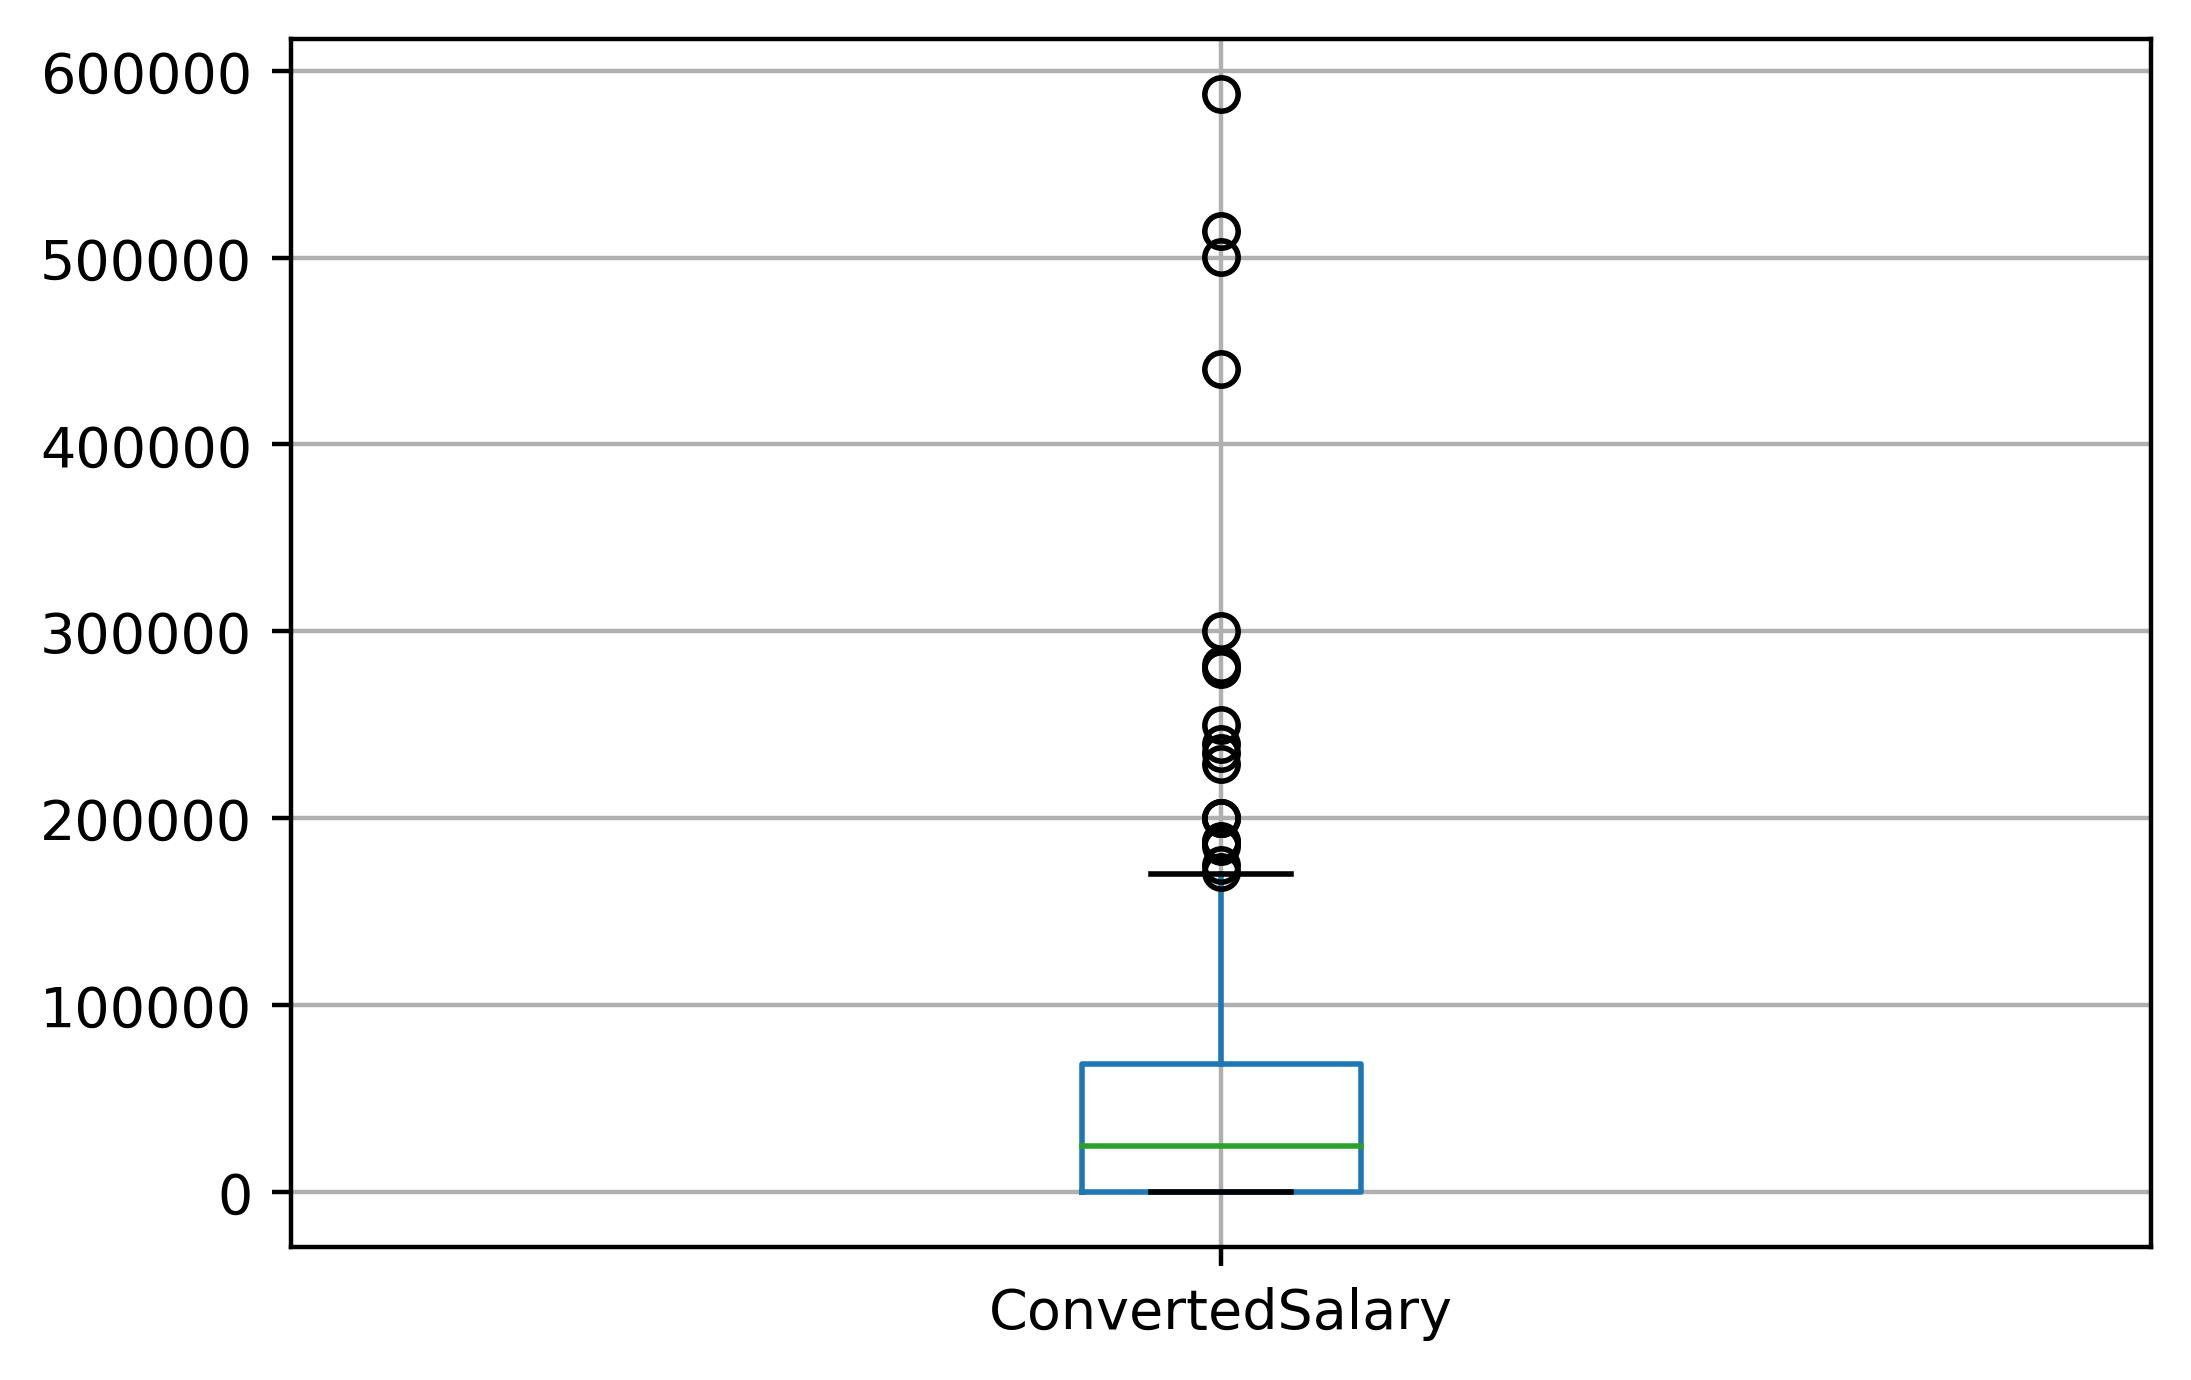

In [127]:
new_df[['ConvertedSalary']].boxplot()
plt.show()